<a href="https://colab.research.google.com/github/SergioDP94/Talleres/blob/main/Taller_Segmentacion_Clientes_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller: Segmentación de clientes con Python
Autor: [Sergio Diaz](https://www.linkedin.com/in/sergio-diaz-paredes/)

Pizarra: [miro](https://miro.com/app/board/uXjVLdumjA0=/?share_link_id=840992873585)

## Paquetes

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [ ]:
market = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTdEvsHWHrGSD6KSgmxWUH5Kl_QP1uBICBMrAGTlEQ90DAKLq_meggPiIuGyh45ZpSaIasB4RkpbXXR/pub?gid=120836105&single=true&output=csv")

In [ ]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Embutidos  90 non-null     float64
 1   Pescado    90 non-null     float64
 2   Pollo      90 non-null     float64
 3   Carne      90 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


## EDA

### Estadistica descriptivas

In [ ]:
market.describe()

,Embutidos,Pescado,Pollo,Carne
count,90.000000,90.000000,90.000000,90.000000
mean,46.834444,51.828889,37.042222,43.014444
std,11.888103,19.426770,15.769491,20.537872
min,21.300000,20.400000,5.200000,7.300000
25%,39.425000,37.225000,25.650000,25.075000
50%,46.350000,44.150000,35.650000,39.450000
75%,56.550000,71.200000,49.425000,62.400000
max,71.100000,95.600000,69.300000,80.500000


In [ ]:
market.corr()

,Embutidos,Pescado,Pollo,Carne
Embutidos,1.000000,0.053112,0.317349,-0.501445
Pescado,0.053112,1.000000,0.708391,-0.660753
Pollo,0.317349,0.708391,1.000000,-0.759839
Carne,-0.501445,-0.660753,-0.759839,1.000000


<Axes: >

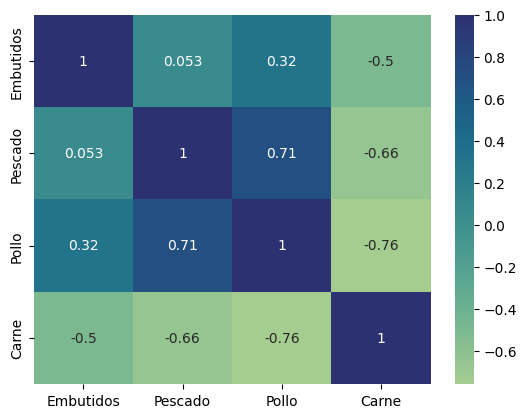

In [ ]:
sns.heatmap(market.corr(), cmap="crest", annot=True)

### Visualización de datos

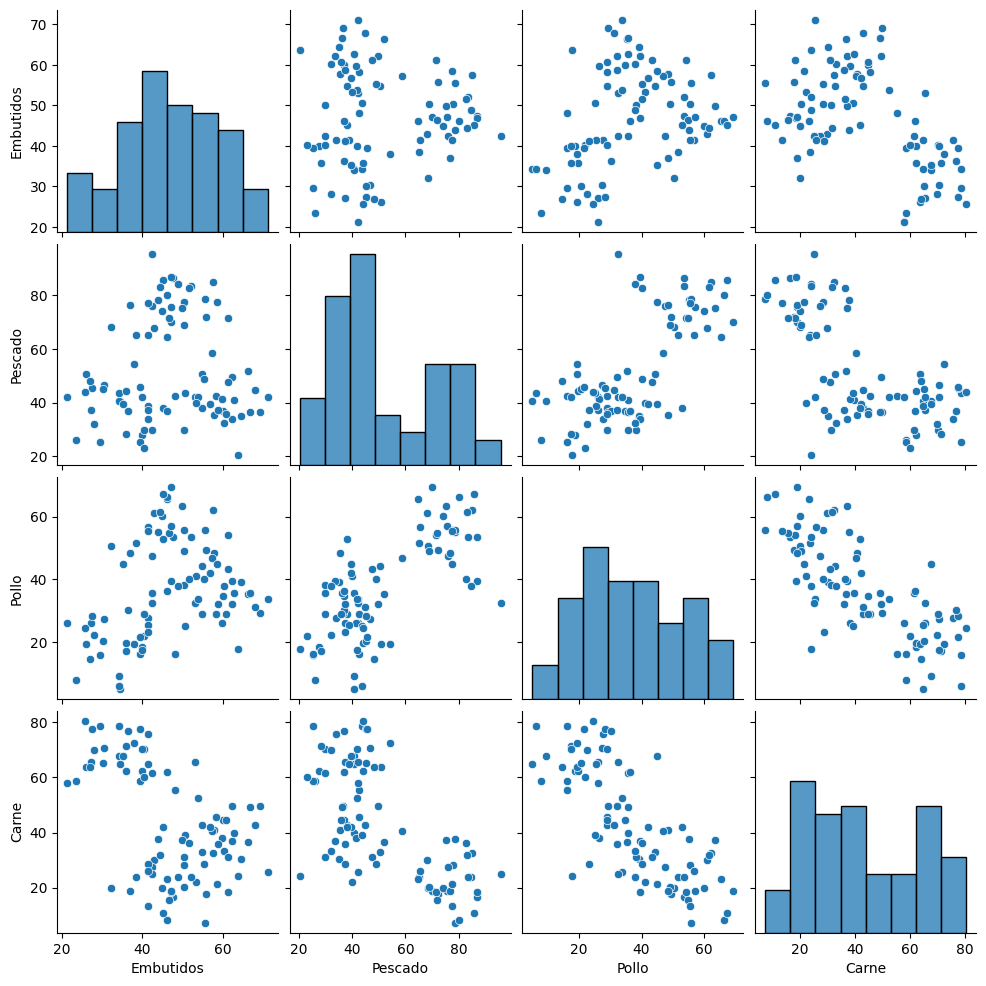

In [ ]:
sns.pairplot(market)

<Axes: >

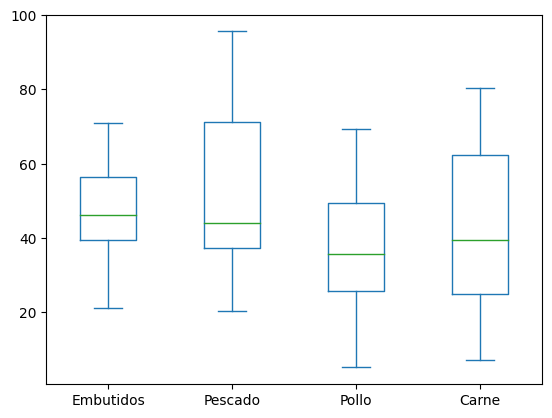

In [ ]:
market.plot.box()

In [ ]:
market.mean()

,0
Embutidos,46.834444
Pescado,51.828889
Pollo,37.042222
Carne,43.014444


## Pre Procesamiento

### Estandarización

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market)

<Axes: >

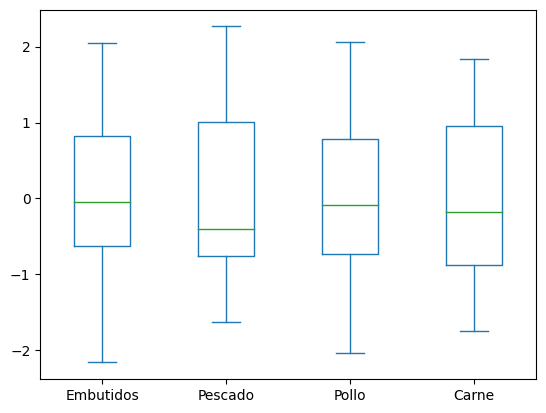

In [ ]:
pd.DataFrame(scaled_data,columns=market.columns).plot.box()

<Axes: ylabel='Density'>

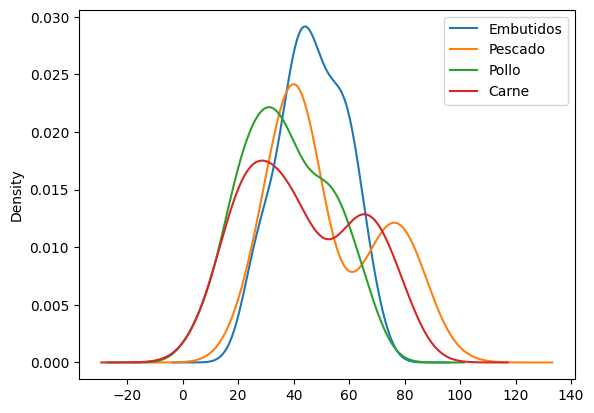

In [ ]:
market.plot.kde()

<Axes: ylabel='Density'>

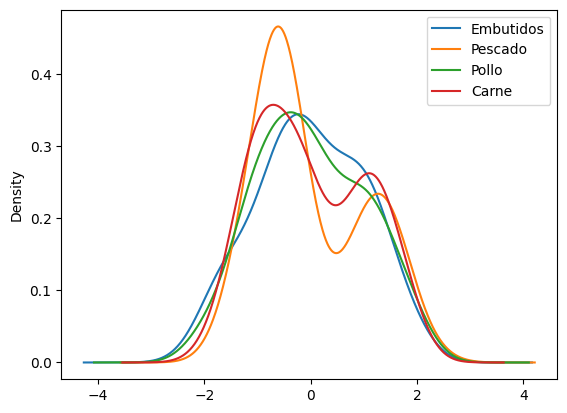

In [ ]:
pd.DataFrame(scaled_data,columns=market.columns).plot.kde()

In [ ]:
pd.DataFrame(scaled_data,columns=market.columns).describe()

,Embutidos,Pescado,Pollo,Carne
count,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01
mean,-5.094690e-16,-7.894919e-17,3.207311e-17,1.085551e-16
std,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00
min,-2.159932e+00,-1.626877e+00,-2.030542e+00,-1.748698e+00
25%,-6.267572e-01,-7.559519e-01,-7.264689e-01,-8.783747e-01
50%,-4.097865e-02,-3.974880e-01,-8.878041e-02,-1.745270e-01
75%,8.218287e-01,1.002721e+00,7.896355e-01,9.491811e-01
max,2.052598e+00,2.265756e+00,2.057041e+00,1.835417e+00


## Modelo de cluster

### Algoritmo k means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k)

### Entrenamiento del modelo

In [ ]:
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

## Resultados

In [ ]:
kmeans.labels_

array([2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1,
       0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       1, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 0.03092196,  1.29708433,  1.08159052, -1.01082044],
       [-1.03010554, -0.70306664, -0.97367946,  1.21244049],
       [ 0.99918357, -0.59401769, -0.10791106, -0.20162005]])

In [ ]:
pd.DataFrame(kmeans.cluster_centers_,columns=market.columns)

,Embutidos,Pescado,Pollo,Carne
0,0.030922,1.297084,1.081591,-1.01082
1,-1.030106,-0.703067,-0.973679,1.21244
2,0.999184,-0.594018,-0.107911,-0.20162


In [ ]:
market['cluster_k3'] = kmeans.labels_

### Visualizando resultados

<Axes: xlabel='cluster_k3', ylabel='Pescado'>

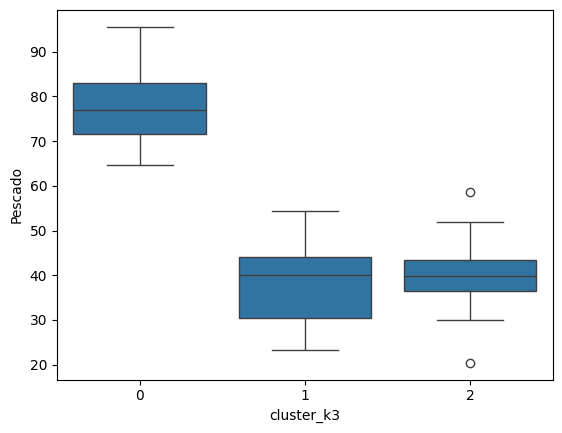

In [ ]:
sns.boxplot(market,x='cluster_k3',y='Pescado')

<Axes: xlabel='cluster_k3', ylabel='Embutidos'>

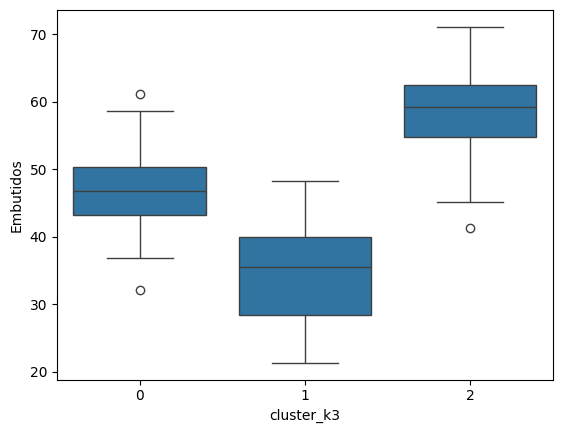

In [ ]:
sns.boxplot(market,x='cluster_k3',y='Embutidos')

<Axes: xlabel='cluster_k3', ylabel='Pollo'>

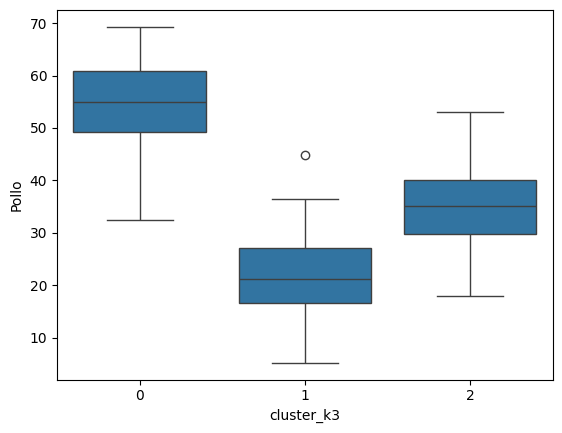

In [ ]:
sns.boxplot(market,x='cluster_k3',y='Pollo')

<Axes: xlabel='cluster_k3', ylabel='Carne'>

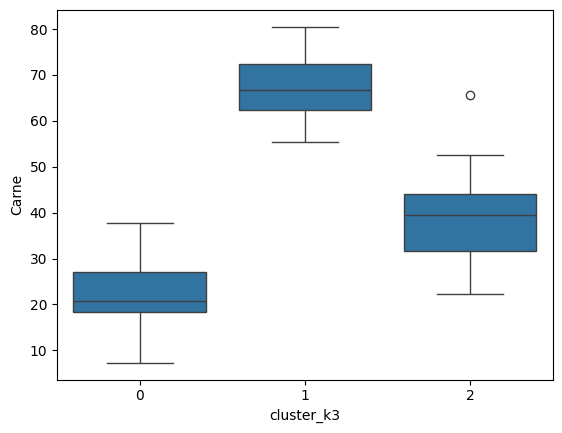

In [ ]:
sns.boxplot(market,x='cluster_k3',y='Carne')

### Preferencia por clusters

In [ ]:
market2 = pd.melt(market,id_vars=['cluster_k3'])

In [ ]:
market2

,cluster_k3,variable,value
0,2,Embutidos,66.3
1,1,Embutidos,48.2
2,2,Embutidos,62.1
3,2,Embutidos,57.7
4,2,Embutidos,54.8
...,...,...,...
355,2,Carne,36.0
356,0,Carne,21.4
357,0,Carne,25.9
358,1,Carne,61.8


<Axes: xlabel='cluster_k3', ylabel='value'>

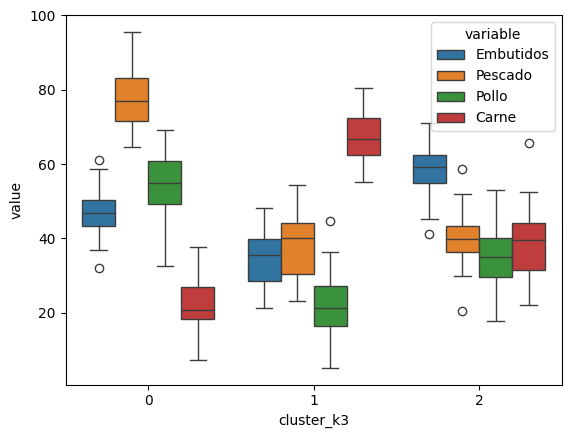

In [ ]:
sns.boxplot(market2,x='cluster_k3',y='value',hue='variable')

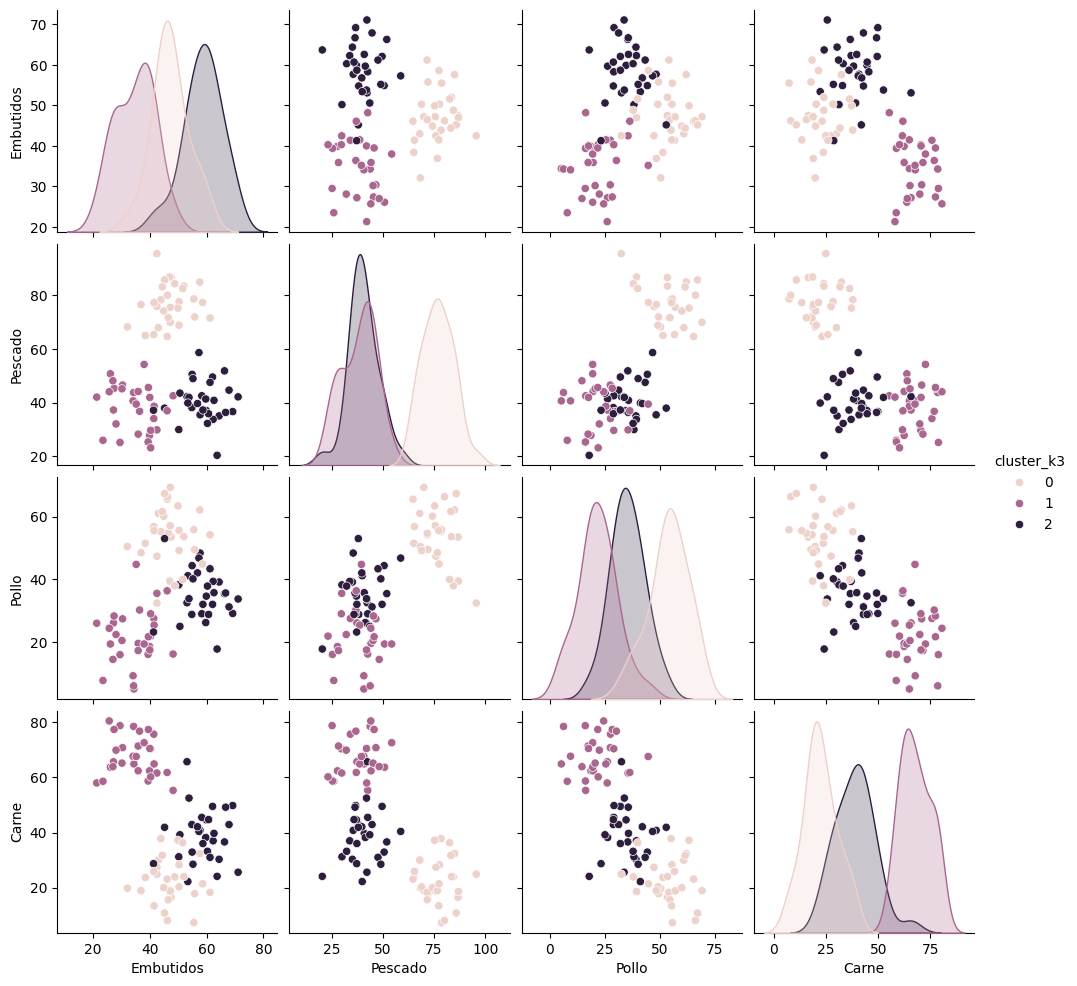

In [ ]:
sns.pairplot(market,hue='cluster_k3')

### Identificando numero optimo de cluster

In [ ]:
kmeans.inertia_

82.44048010009016

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

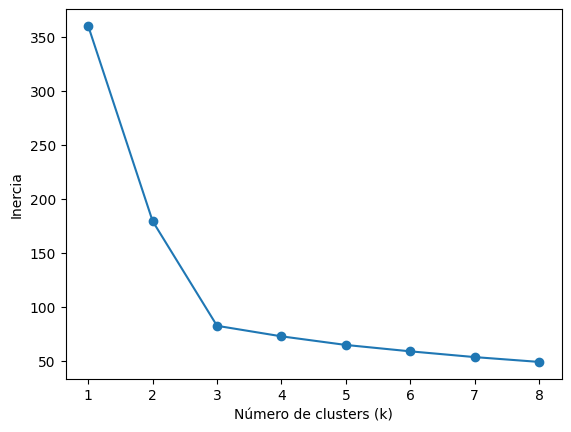

In [ ]:
inertia = []
max_k = 8
for k in range(1,max_k+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,max_k+1), inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.show()